# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [60]:

weather_cities = []
latitude = []
longitude = []
temperature = []
temp_max = []
temp_min = []
humidity = []
cloudiness = []
country = []
date = []
wind_speed = []


loop_counter = 1

print("Beginning Data Retrieval")
print("-------------------------------")

#for i in range(10):
#    city = cities[i]
for city in cities:
    print(f"Processing record {loop_counter} of {len(cities)} | {city}" )
    loop_counter += 1
    # First with the city name we make a call to openweather's geocoding api to get the latitude and longitude of the city
    # This is going to be more accurate than if we just used the randomly generated coordinates we started with
    
    try:
        city_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&appid={weather_api_key}"
        geocode_js = requests.get(city_url).json()
        lat = geocode_js[0]["lat"]
        lon = geocode_js[0]["lon"]
    
        # With the latitude and longitude in hand we can get the weather info
        request_url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&units=imperial&appid={weather_api_key}"
        weather_js = requests.get(request_url).json()
        
        # First we put the data we want into a bunch of variables
        # We do this first before appending in case there is some missing data, then we catch the error here and get
        # kicked out of the loop before we start appending to our data lists
        t = weather_js["main"]["temp"]
        t_max = weather_js["main"]["temp_max"]
        t_min = weather_js["main"]["temp_min"]
        hum = weather_js["main"]["humidity"]
        cloud = weather_js["clouds"]["all"]
        co = weather_js["sys"]["country"]
        da = weather_js["dt"]
        ws = weather_js["wind"]["speed"]
        
        
        
        weather_cities.append(city)
        latitude.append(lat)
        longitude.append(lon)
        
        temperature.append(t)
        temp_max.append(t_max)
        temp_min.append(t_min)
        humidity.append(hum)
        cloudiness.append(cloud)
        country.append(co)
        date.append(da)
        wind_speed.append(ws)
        
        
    except:
        print(f"City not found. Skipping {city}...")
        pass
    
print("Complete!")

Beginning Data Retrieval
-------------------------------
Processing record 1 of 632 | banda aceh
Processing record 2 of 632 | pacific grove
Processing record 3 of 632 | constitucion
Processing record 4 of 632 | hermanus
Processing record 5 of 632 | thompson
Processing record 6 of 632 | ushuaia
Processing record 7 of 632 | vaini
Processing record 8 of 632 | kapaa
Processing record 9 of 632 | abu kamal
Processing record 10 of 632 | lavrentiya
Processing record 11 of 632 | tucuman
Processing record 12 of 632 | vila velha
Processing record 13 of 632 | port hardy
Processing record 14 of 632 | rio gallegos
Processing record 15 of 632 | isangel
Processing record 16 of 632 | bluff
Processing record 17 of 632 | busselton
Processing record 18 of 632 | mataura
Processing record 19 of 632 | huilong
Processing record 20 of 632 | quatre cocos
Processing record 21 of 632 | leningradskiy
Processing record 22 of 632 | avarua
Processing record 23 of 632 | hilo
Processing record 24 of 632 | new norfolk
P

Processing record 196 of 632 | bolshiye uki
Processing record 197 of 632 | tupik
Processing record 198 of 632 | pingliang
Processing record 199 of 632 | kautokeino
Processing record 200 of 632 | almaznyy
Processing record 201 of 632 | provideniya
Processing record 202 of 632 | campo maior
Processing record 203 of 632 | santa maria
Processing record 204 of 632 | yakeshi
Processing record 205 of 632 | mino
Processing record 206 of 632 | ambulu
Processing record 207 of 632 | pangai
Processing record 208 of 632 | srednekolymsk
Processing record 209 of 632 | nizhneyansk
Processing record 210 of 632 | cordoba
Processing record 211 of 632 | faanui
Processing record 212 of 632 | bentiu
Processing record 213 of 632 | chekhov
Processing record 214 of 632 | agva
Processing record 215 of 632 | genhe
Processing record 216 of 632 | mehamn
Processing record 217 of 632 | ahipara
Processing record 218 of 632 | male
Processing record 219 of 632 | maihar
Processing record 220 of 632 | meyungs
City not fo

Processing record 391 of 632 | westport
Processing record 392 of 632 | bonoua
Processing record 393 of 632 | taoudenni
Processing record 394 of 632 | nicolas bravo
Processing record 395 of 632 | cicero dantas
Processing record 396 of 632 | dajal
Processing record 397 of 632 | gadwal
Processing record 398 of 632 | minab
Processing record 399 of 632 | kaeo
Processing record 400 of 632 | kisangani
Processing record 401 of 632 | kindu
Processing record 402 of 632 | ngunguru
Processing record 403 of 632 | lodja
Processing record 404 of 632 | berlevag
Processing record 405 of 632 | hong gai
Processing record 406 of 632 | grenville
Processing record 407 of 632 | grindavik
Processing record 408 of 632 | novikovo
Processing record 409 of 632 | attawapiskat
Processing record 410 of 632 | carutapera
Processing record 411 of 632 | osuna
Processing record 412 of 632 | hovd
Processing record 413 of 632 | sakaiminato
Processing record 414 of 632 | puerto gaitan
Processing record 415 of 632 | sola
Pro

Processing record 588 of 632 | east millcreek
Processing record 589 of 632 | khilok
Processing record 590 of 632 | madiun
Processing record 591 of 632 | dawei
Processing record 592 of 632 | cabra
Processing record 593 of 632 | carnot
Processing record 594 of 632 | camopi
Processing record 595 of 632 | manta
Processing record 596 of 632 | palabuhanratu
Processing record 597 of 632 | cap-aux-meules
Processing record 598 of 632 | hokitika
Processing record 599 of 632 | phan rang
Processing record 600 of 632 | zhangye
Processing record 601 of 632 | talaya
Processing record 602 of 632 | teluk intan
Processing record 603 of 632 | karakendzha
City not found. Skipping karakendzha...
Processing record 604 of 632 | aleysk
Processing record 605 of 632 | athabasca
Processing record 606 of 632 | urengoy
Processing record 607 of 632 | ambon
Processing record 608 of 632 | linxia
Processing record 609 of 632 | henties bay
Processing record 610 of 632 | acari
Processing record 611 of 632 | zhezkazgan
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [83]:
weather_df = pd.DataFrame({
    "City":weather_cities,
    "Lat":latitude,
    "Lon":longitude,
    "Temperature":temperature,
    "Min Temp":temp_min,
    "Max Temp":temp_max,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date
})
weather_df.to_csv("output_data/city_weather.csv")
weather_df

,City,Lat,Lon,Temperature,Min Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,banda aceh,5.552846,95.319291,85.89,85.89,85.89,67,97,10.76,ID,1651459094
1,pacific grove,36.621115,-121.917794,54.21,51.67,63.05,81,0,10.36,US,1651458821
2,constitucion,-35.331831,-72.411900,52.29,52.29,52.29,73,2,6.62,CL,1651459095
3,hermanus,-34.417500,19.236111,59.85,59.85,59.85,80,99,9.15,ZA,1651459096
4,thompson,55.743347,-97.863464,24.98,24.98,24.98,86,100,13.80,CA,1651459096
...,...,...,...,...,...,...,...,...,...,...,...
598,yunjinghong,22.007652,100.802150,76.32,76.32,76.32,68,94,3.36,CN,1651459479
599,kutum,14.210837,24.649584,76.15,76.15,76.15,11,45,6.13,SD,1651459479
600,shalakusha,62.227791,40.255424,30.51,30.51,30.51,83,100,5.06,RU,1651459480
601,williams lake,52.129266,-122.139726,59.27,59.27,59.27,38,100,8.05,CA,1651459481


In [2]:
# This line is to read directly from the csv file so I don't have to rerun the api requests every time if I restart the notebook

weather_df = pd.read_csv("output_data/city_weather.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [3]:
weather_df["Humidity"].max()
# No cities were over 100% humidity

100

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [4]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<AxesSubplot:title={'center':'Latitude vs. Temperature'}, xlabel='Latitude', ylabel='Maximum Temperature'>

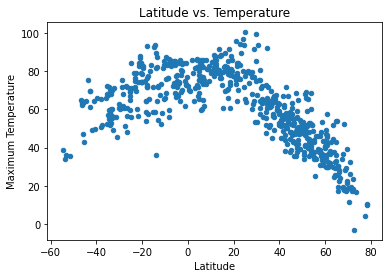

In [5]:
weather_df.plot(kind="scatter", x="Lat", xlabel="Latitude", y="Max Temp", ylabel="Maximum Temperature", title="Latitude vs. Temperature")

## Latitude vs. Humidity Plot

<AxesSubplot:title={'center':'Latitude vs. Humidity'}, xlabel='Latitude', ylabel='Humidity (%)'>

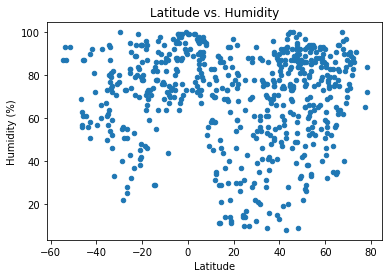

In [6]:
weather_df.plot(kind="scatter", x="Lat", xlabel="Latitude", y="Humidity", ylabel="Humidity (%)", title="Latitude vs. Humidity")

## Latitude vs. Cloudiness Plot

<AxesSubplot:title={'center':'Latitude vs. Cloudiness'}, xlabel='Latitude', ylabel='Cloudiness (%)'>

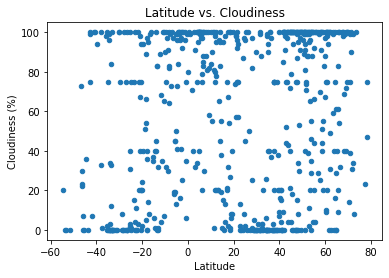

In [7]:
weather_df.plot(kind="scatter", x="Lat", xlabel="Latitude", y="Cloudiness", ylabel="Cloudiness (%)", title="Latitude vs. Cloudiness")

## Latitude vs. Wind Speed Plot

<AxesSubplot:title={'center':'Latitude vs. Wind Speed'}, xlabel='Latitude', ylabel='Wind Speed (mph)'>

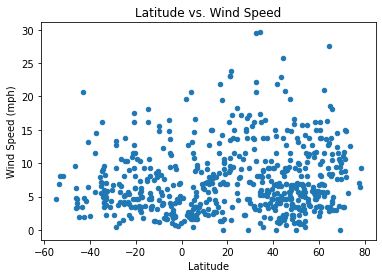

In [8]:
weather_df.plot(kind="scatter", x="Lat", xlabel="Latitude", y="Wind Speed", ylabel="Wind Speed (mph)", title="Latitude vs. Wind Speed")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


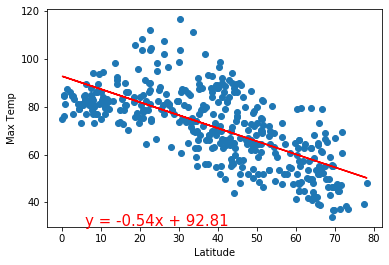

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


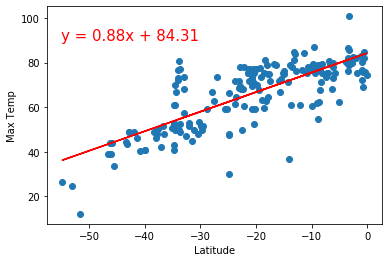

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


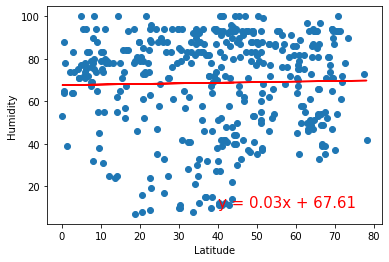

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


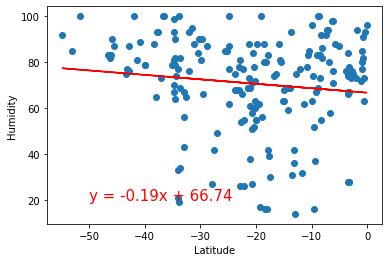

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


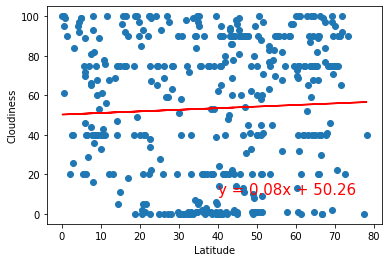

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


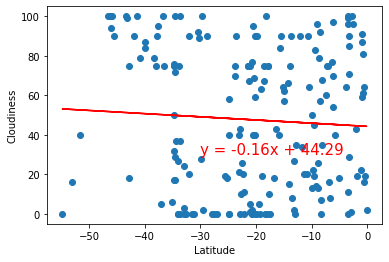

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


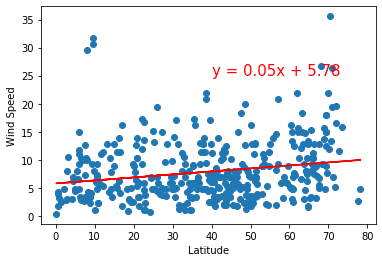

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


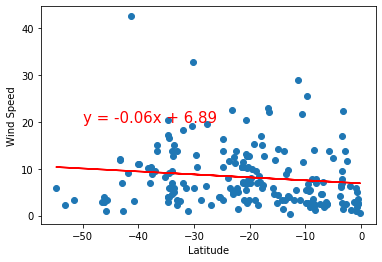